**IMPORT THE PACKAGES**

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from scipy import stats

**READ THE DATASET**

In [5]:
df=pd.read_csv(r'Preprocessed_data - Preprocessed_data.csv')
df

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,...,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,...,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,...,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,...,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,...,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,53,0,0,36.807595,-118.901544,0,1,5,42.09,...,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,0,20,0,0,32.759327,-116.997260,0,13,4,46.68,...,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,1,40,1,0,37.734971,-120.954271,1,22,4,16.20,...,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,1,22,0,0,39.108252,-123.645121,0,2,5,18.62,...,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


**Data Quick checks**

- Shape - [shape]
- Size - [size]
- Length - [len]
- Data type - [dtypes]
- columns


In [7]:
#shape
print(f'Shape of Dataset:{df.shape}')
print('----------------------------')
#size 
print(f'Size of dataset:{df.size}')
print('----------------------------')
#length
print(f'Length of Dataset:{len(df)}')
print('----------------------------')
#dtypes
print(df.dtypes)
print('----------------------------')
#columns
print(df.columns)


Shape of Dataset:(4835, 31)
----------------------------
Size of dataset:149885
----------------------------
Length of Dataset:4835
----------------------------
Gender                                 int64
Age                                    int64
Married                                int64
Number of Dependents                   int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                  int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Type                          int64
Avg Monthly GB Download                int64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming Movies             

$ML-Model$_$Development$

- We divide data into two parts i.e input data and output data

- input data = X; output data=y

- Again we divide input data into two parts i.e train and test

- input train data= x_train; input test data= x_test

- similarly we divide output data into two parts i.e train and test

- output train data= y_train; output test data= y_test

- Model development happens on train data i.e x_train and y_train

- Model will predict by passing x_test data, these are called y_predictions

- y_predictions will compare with y_test , this is called test accuracy/ test error

# With out hyperparameter tuning

**Decision Tree Classifier**

Accuracy is : 75.28
F1 is : 0.82
Precision is : 0.83
Recall is : 0.8


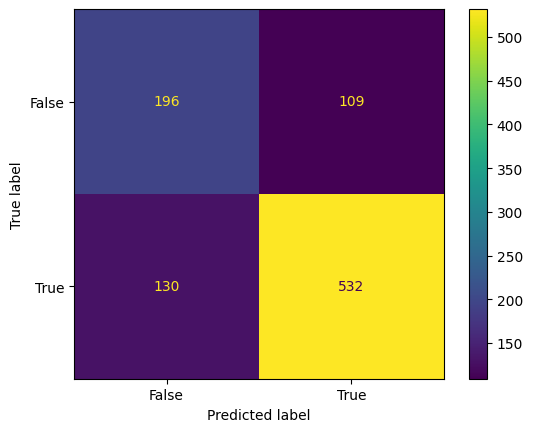

True negative: 196
False positive: 109
False negative: 130
True negative: 532


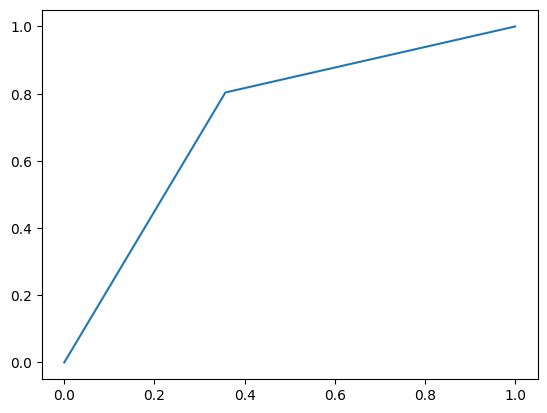

In [10]:
# Read the data
df=pd.read_csv(r'Preprocessed_data - Preprocessed_data.csv')

# Divide the data into X and y
X=df.drop('Customer Status',axis=1)
y=df['Customer Status']

# Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# Outlier analysis based on z-score
selected_columns=['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                  'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_score=np.abs(stats.zscore(X_train[selected_columns]))
threshold=3
outlier_indices=np.where(z_score>threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

# Model implementation
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

# Predictions
y_pred_dt=DT.predict(X_test)

# Model evaluation
acc_dt=round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
print('Accuracy is :',acc_dt)
print('F1 is :',f1_dt)
print('Precision is :',precision_dt)
print('Recall is :',recall_dt)

# Confusion Matrix
cmt_dt=confusion_matrix(y_test,y_pred_dt)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt_dt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_dt).ravel()
print('True negative:',tn)
print('False positive:',fp)
print('False negative:',fn)
print('True negative:',tp)

# ROC-AUC curve
y_dt_pred_prob=DT.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot(fpr,tpr)

**Logistic Regression**

Accuracy is : 77.77
F1 is : 0.84
Precision is : 0.82
Recall is : 0.86


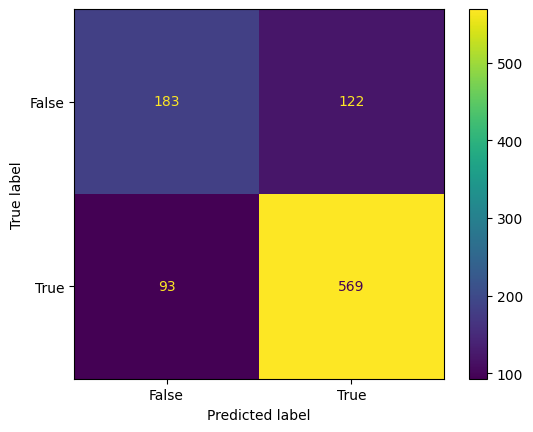

True negative: 183
False positive: 122
False negative: 93
True negative: 569


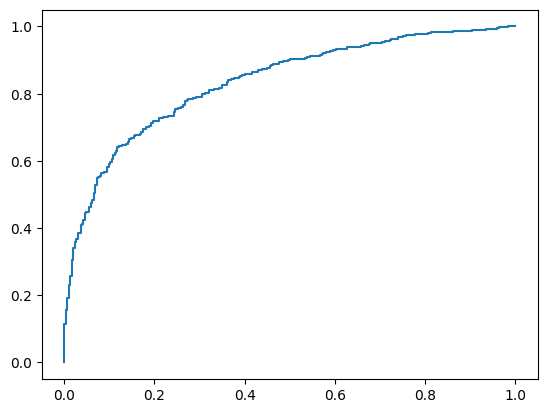

In [11]:
# Read the data
df=pd.read_csv(r'Preprocessed_data - Preprocessed_data.csv')

# Divide the data into X and y
X=df.drop('Customer Status',axis=1)
y=df['Customer Status']

# Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# Outlier analysis based on z-score
selected_columns=['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                  'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_score=np.abs(stats.zscore(X_train[selected_columns]))
threshold=3
outlier_indices=np.where(z_score>threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

# Model implementation
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)

# Predictions
y_pred_lr=LR.predict(X_test)

# Model evaluation
acc_lr=round(accuracy_score(y_test,y_pred_lr)*100,2)
f1_lr=round(f1_score(y_test,y_pred_lr),2)
precision_lr=round(precision_score(y_test,y_pred_lr),2)
recall_lr=round(recall_score(y_test,y_pred_lr),2)
print('Accuracy is :',acc_lr)
print('F1 is :',f1_lr)
print('Precision is :',precision_lr)
print('Recall is :',recall_lr)

# Confusion Matrix
cmt_lr=confusion_matrix(y_test,y_pred_lr)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt_lr,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_lr).ravel()
print('True negative:',tn)
print('False positive:',fp)
print('False negative:',fn)
print('True negative:',tp)

# ROC-AUC curve
y_lr_pred_prob=LR.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_lr_pred_prob)
plt.plot(fpr,tpr)

**Naive Bayes**

Accuracy is : 75.18
F1 is : 0.8
Precision is : 0.87
Recall is : 0.75


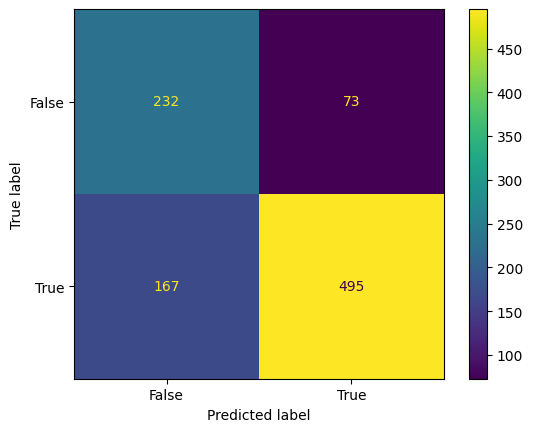

True negative: 232
False positive: 73
False negative: 167
True negative: 495


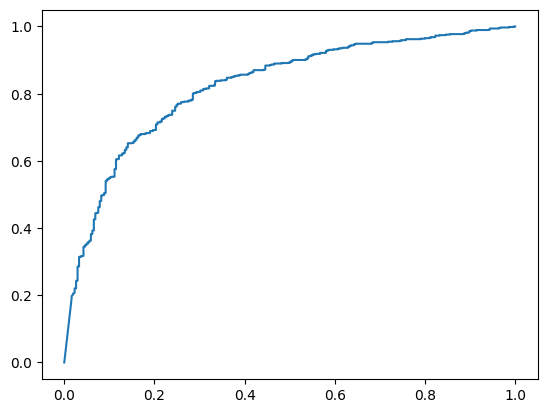

In [12]:
# Read the data
df=pd.read_csv(r'Preprocessed_data - Preprocessed_data.csv')

# Divide the data into X and y
X=df.drop('Customer Status',axis=1)
y=df['Customer Status']

# Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# Outlier analysis based on z-score
selected_columns=['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                  'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_score=np.abs(stats.zscore(X_train[selected_columns]))
threshold=3
outlier_indices=np.where(z_score>threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

# Model implementation
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,y_train)

# Predictions
y_pred_nb=NB.predict(X_test)

# Model evaluation
acc_nb=round(accuracy_score(y_test,y_pred_nb)*100,2)
f1_nb=round(f1_score(y_test,y_pred_nb),2)
precision_nb=round(precision_score(y_test,y_pred_nb),2)
recall_nb=round(recall_score(y_test,y_pred_nb),2)
print('Accuracy is :',acc_nb)
print('F1 is :',f1_nb)
print('Precision is :',precision_nb)
print('Recall is :',recall_nb)

# Confusion Matrix
cmt_nb=confusion_matrix(y_test,y_pred_nb)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt_nb,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_nb).ravel()
print('True negative:',tn)
print('False positive:',fp)
print('False negative:',fn)
print('True negative:',tp)

# ROC-AUC curve
y_nb_pred_prob=NB.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_nb_pred_prob)
plt.plot(fpr,tpr)

**KNN**

Accuracy is : 73.73
F1 is : 0.81
Precision is : 0.79
Recall is : 0.84


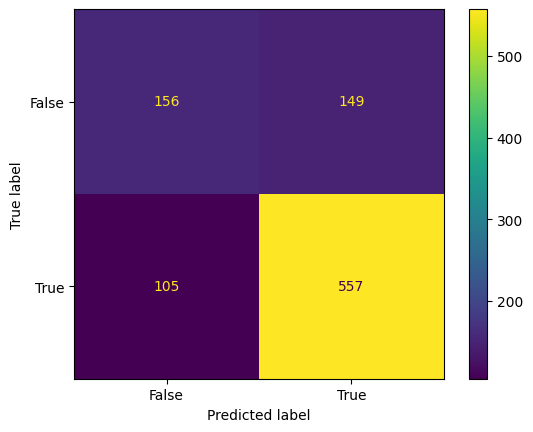

True negative: 156
False positive: 149
False negative: 105
True negative: 557


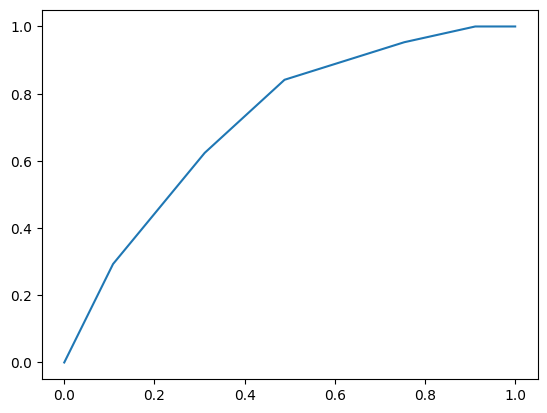

In [24]:
# Read the data
df=pd.read_csv(r'Preprocessed_data - Preprocessed_data.csv')

# Divide the data into X and y
X=df.drop('Customer Status',axis=1)
y=df['Customer Status']

# Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# Outlier analysis based on z-score
selected_columns=['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                  'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_score=np.abs(stats.zscore(X_train[selected_columns]))
threshold=3
outlier_indices=np.where(z_score>threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

# Model implementation
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)

# Predictions
y_pred_knn=KNN.predict(X_test)

# Model evaluation
acc_knn=round(accuracy_score(y_test,y_pred_knn)*100,2)
f1_knn=round(f1_score(y_test,y_pred_knn),2)
precision_knn=round(precision_score(y_test,y_pred_knn),2)
recall_knn=round(recall_score(y_test,y_pred_knn),2)
print('Accuracy is :',acc_knn)
print('F1 is :',f1_knn)
print('Precision is :',precision_knn)
print('Recall is :',recall_knn)
# Confusion Matrix
cmt_knn=confusion_matrix(y_test,y_pred_knn)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt_knn,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_knn).ravel()
print('True negative:',tn)
print('False positive:',fp)
print('False negative:',fn)
print('True negative:',tp)

# ROC-AUC curve
y_knn_pred_prob=KNN.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_knn_pred_prob)
plt.plot(fpr,tpr)

**Random Forest**

Accuracy is : 82.52
F1 is : 0.88
Precision is : 0.85
Recall is : 0.9


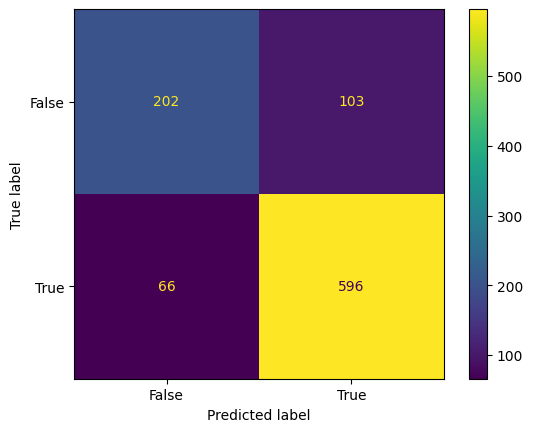

True negative: 202
False positive: 103
False negative: 66
True negative: 596


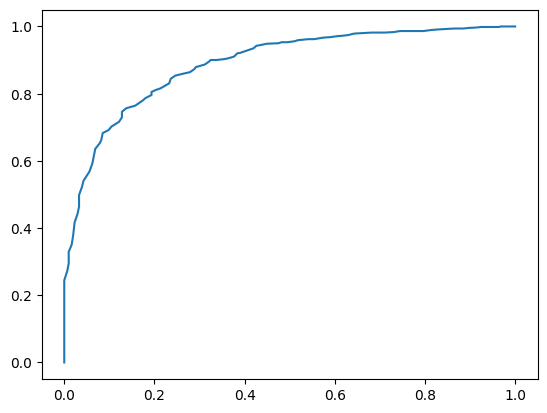

In [28]:
# Read the data
df=pd.read_csv(r'Preprocessed_data - Preprocessed_data.csv')

# Divide the data into X and y
X=df.drop('Customer Status',axis=1)
y=df['Customer Status']

# Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# Outlier analysis based on z-score
selected_columns=['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                  'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_score=np.abs(stats.zscore(X_train[selected_columns]))
threshold=3
outlier_indices=np.where(z_score>threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

# Model implementation
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

# Predictions
y_pred_rf=RF.predict(X_test)

# Model evaluation
acc_rf=round(accuracy_score(y_test,y_pred_rf)*100,2)
f1_rf=round(f1_score(y_test,y_pred_rf),2)
precision_rf=round(precision_score(y_test,y_pred_rf),2)
recall_rf=round(recall_score(y_test,y_pred_rf),2)
print('Accuracy is :',acc_rf)
print('F1 is :',f1_rf)
print('Precision is :',precision_rf)
print('Recall is :',recall_rf)

# Confusion Matrix
cmt_rf=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt_rf,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_rf).ravel()
print('True negative:',tn)
print('False positive:',fp)
print('False negative:',fn)
print('True negative:',tp)

# ROC-AUC curve
y_rf_pred_prob=RF.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_rf_pred_prob)
plt.plot(fpr,tpr)

**All metrics**

In [38]:
dict1={'Accuracy':[acc_dt,acc_knn,acc_lr,acc_nb,acc_rf],
       'Precision':[precision_dt,precision_knn,precision_lr,precision_nb,precision_rf],
       'Recall':[recall_dt,recall_knn,recall_lr,recall_nb,recall_rf],
       'F1-score':[f1_dt,f1_knn,f1_lr,f1_nb,f1_rf]}
pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score
DT,76.94,0.84,0.82,0.83
KNN,73.73,0.79,0.84,0.81
Logistic,77.77,0.82,0.86,0.84
Naive Bayes,75.18,0.87,0.75,0.80
Random Forest,82.52,0.85,0.90,0.88
